In [25]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math
pd.set_option('display.max_colwidth', -1)
def highlight_cells(row):
    color = ''
    if ('Section' in row.index.values and row['Section'] == 'Total') or ('Title' in row.index.values and row['Title'] == 'Total') or ('Months' in row.index.values and (row['Months'] == 'Total' or row['Months'] == 'Average') or ('Terms' in row.index.values and row['Terms'] == 'Total')) :
        color = 'yellow'    
    background = ['background-color: {}'.format(color) for _ in row]
    return background

## Cantidad de usuarios

In [2]:
%cypher MATCH (n:User) RETURN count(n)

1 rows affected.


count(n)
942


## 20 Usuarios que más comentaron

In [3]:
dfUsers = %%cypher MATCH p=(n:User)-[r:COMMENTS]->() RETURN count(p) as Comments, n.name as Users order by Comments DESC LIMIT 20
dfUsers = dfUsers.get_dataframe()
dfUsers.set_index('Users')

20 rows affected.


,Comments
Users,
ACORE,74
Iguana67,57
Maria Paula Hoyos,55
SILVIA JARAMILLO ECHEVERRI,53
Tito Flavio Torres,50
fernando fonseca,48
Miguel Ramirez,43
manuelk,43
jorge48,42


## Cantidad de comentarios 

In [4]:
%cypher MATCH (n:Comment)-[:IS_ABOUT]->(h:Article{valid:True}) RETURN count(n)

1 rows affected.


count(n)
5795


## Cantidad de comentarios por sección

In [5]:
dfComments = %%cypher MATCH ()-[r:IS_ABOUT]->(n:Article{valid:True})  RETURN count(r) as Comments, n.section as Section ORDER BY Comments DESC LIMIT 20
dfComments = dfComments.get_dataframe()
dfComments = dfComments.set_index('Section')
dfComments.loc['Total'] = dfComments['Comments'].sum()
dfComments = dfComments.reset_index()
dfComments.style.apply(highlight_cells, axis=1)

7 rows affected.


,Section,Comments
0,Silla Nacional,3714
1,Opinión,941
2,La Silla,370
3,La Silla Caribe,350
4,La Silla Santandereana,195
5,Hágame el cruce,152
6,La Silla Pacífico,73
7,Total,5795


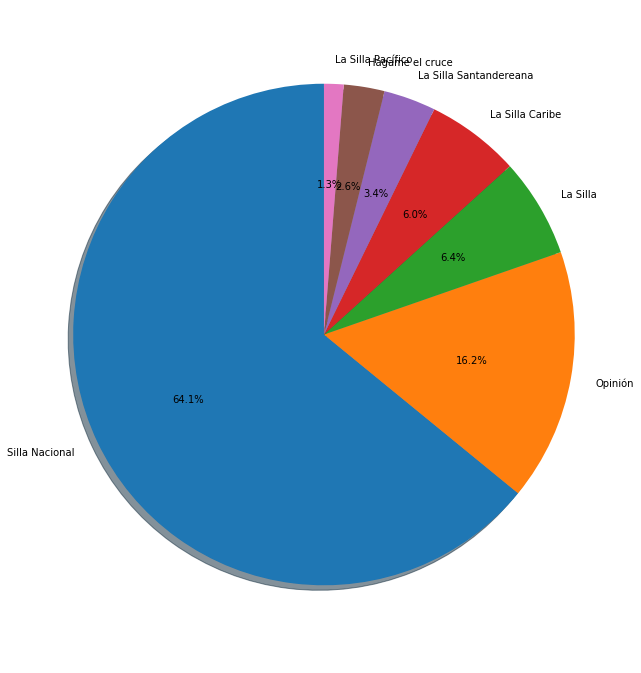

In [6]:
matplotlib.rcParams['figure.figsize'] = (10.0,12.0)
dfComments = dfComments.drop([7])
labels = dfComments['Section'].values
sizes = dfComments['Comments'].values
explode = (0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## Promedio de comentarios en un artículo (respecto al total de artículos = 1010)

In [37]:
dfArt = %%cypher MATCH ()-[r:IS_ABOUT]->(n:Article{valid:True})  RETURN count(r) as Comments, n.title as Title, n.date as Date ORDER BY Comments DESC 
dfArt = dfArt.get_dataframe()
print('Average: ', dfArt['Comments'].sum()/1010)

724 rows affected.
Average:  5.73762376238


## Promedio de usuarios en un artículo

In [38]:
print('Average: ', 942/1010)

Average:  0.9326732673267327


## 20 Artículos más comentados 

In [40]:
dfArt[:20].set_index('Title')

,Comments,Date
Title,,
Colombia dijo No y siguió partida en dos,50,02 de Octubre de 2016
Pal 2018,50,22 de Octubre de 2016
¿Qué es una ideología de género?,50,11 de Agosto de 2016
Santos: el lastre del Sí,50,08 de Agosto de 2016
"Se necesitaba un ""tipo"" como Santos",49,24 de Junio de 2016
Tras el No: tres escenarios improbables,48,04 de Octubre de 2016
Uribe sigue siendo el rey,48,03 de Octubre de 2016
"El plebiscito: entre el ""sin plan B"" y ""un mejor acuerdo""",44,29 de Julio de 2016
El doble filo de la participación social en el Acuerdo de Paz,42,19 de Septiembre de 2016


# Frecuencia de comentarios

## Cantidad de comentarios mensuales. 

In [32]:
dfFrec = %%cypher MATCH (n:Comment)-[:IS_ABOUT]-(a:Article{valid:True}) RETURN n.cid as ID, n.date as Date
dfFrec = dfFrec.get_dataframe()
times = dfFrec.Date.apply(lambda x: datetime.datetime.strptime(x.replace('de Enero', '01 2016').replace('de Febrero', '02 2016').replace('de Marzo', '03 2016').replace('de Abril', '04 2016').replace('de Mayo', '05 2016').replace('de Junio', '06 2016').replace('de Julio', '07 2016').replace('de Agosto', '08 2016').replace('de Septiembre', '09 2016').replace('de Octubre', '10 2016').replace('de Noviembre', '11 2016').replace('de Diciembre', '12 2016'), "%d %m %Y"))
dfFrec ['Date'] =  times

dfTimesMensuales = dfFrec.groupby(dfFrec['Date'].dt.month).agg({'ID':'count'})
dfTimesMensuales.loc['Average'] =  math.ceil(dfTimesMensuales['ID'].mean()*100/100)
dfTimesMensuales.loc['Total'] =  dfTimesMensuales.drop(['Average'])['ID'].sum()
dfTimesMensuales.columns = ['Number']
dfTimesMensuales.index.rename('Months', inplace=True)
dfTimesMensuales = dfTimesMensuales.rename({1:'Enero', 2:'Febrero', 3:'Marzo',4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})
dfTimesMensuales = dfTimesMensuales.reset_index()
dfTimesMensuales.style.apply(highlight_cells, axis=1)

5795 rows affected.


,Months,Number
0,Enero,219
1,Febrero,369
2,Marzo,150
3,Abril,349
4,Mayo,420
5,Junio,551
6,Julio,611
7,Agosto,670
8,Septiembre,708
9,Octubre,885


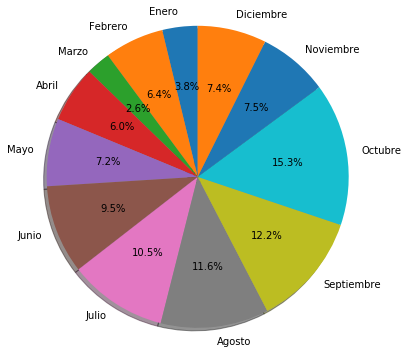

In [34]:
dfTimesMensuales = dfTimesMensuales.drop([12,13])
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)

labels = dfTimesMensuales['Months'].values
sizes = dfTimesMensuales['Number'].values
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## 10 Días con mayor cantidad de comentarios

##### El 03 de Octubre el día de mayor actividad en twitter también. Se puede considerar como el de mayor reacción en las redes.  Ver "Top 20 days with more tweets" https://github.com/ylizama/cl_tweets/blob/master/Frequency.ipynb . El día 04 de octubre está en el noveno puesto en la lista. 

In [41]:
dfTimesTopDays = dfFrec.groupby(dfFrec['Date']).agg({'ID':'count'})
dfTimesTopDays.columns = ['Cantidad']
dfTimesTopDays = dfTimesTopDays.sort_values(by='Cantidad', ascending=False)
dfTimesTopDays.head(10)

,Cantidad
Date,
2016-10-03,114
2016-10-04,99
2016-08-08,62
2016-09-29,58
2016-10-02,55
2016-07-07,53
2016-10-13,52
2016-08-11,51
2016-08-31,48


In [ ]:
Frecuencia diaria de comentarios 

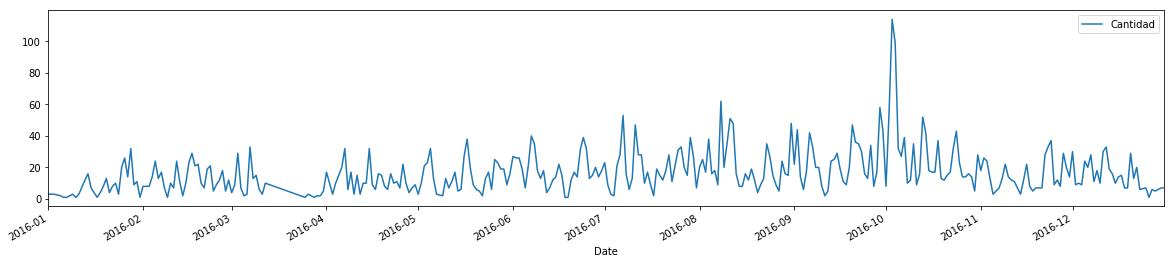

In [42]:
matplotlib.rcParams['figure.figsize'] = (20.0, 4.0)
dfTimesTopDays.plot()

## Análisis del texto de los comentarios

In [43]:
from nltk import ngrams
import operator
from itertools import islice
import string 
from tabulate import tabulate

def stopWordsInGrams(grams):    
    count = 0
    for w in grams:
        if w in stop_words_spanish:
            count = count + 1                
    return count/len(grams)  

def isNumber(s):
    try: 
        int(s)
        float(s)
        return True
    except ValueError:
        return False

def getNGram(text, n, stop_words, m):
    text = text.lower()
    ngramas = ngrams(text.split(), n)
    h_dict = {}   
    for grams in ngramas:
        if stopWordsInGrams(grams) > 0.34:
            continue
        words = ' '.join(grams)        
        words = words.lower() 
        words = ''.join(e for e in words if e.isalnum() or e == ' ')    
        words = words.strip()  
        if  words in stop_words or words in punct_signs or words == '' or words in abc or isNumber(words) or len(words.split(' ')) != n:
             continue
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    if m is -1:
        return list(sorted_dict)
    else:
        return list(islice(sorted_dict, m))

In [47]:
stop_words_spanish = ['un', 'una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún', 'alguno', 'alguna', 'algunos', 'algunas', 'ser', 'es', 'soy', 'eres', 'somos', 'sois', 'estoy', 'esta', 'estamos', 'estais', 'estan', 'como', 'en', 'para', 'atras', 'porque', 'por qué',  'estaba', 'ante', 'antes', 'siendo', 'ambos', 'pero', 'por', 'poder', 'puede', 'puedo', 'podemos', 'podeis', 'pueden', 'fui', 'fue', 'fuimos', 'fueron', 'hacer', 'hago', 'hace', 'hacemos', 'haceis', 'hacen', 'cada', 'fin', 'incluso', 'primero', 'desde', 'conseguir', 'consigo', 'consigue', 'consigues', 'conseguimos', 'consiguen', 'ir', 'voy', 'va', 'vamos', 'vais', 'van', 'vaya', 'gueno', 'ha', 'tener', 'tengo', 'tiene', 'tenemos', 'teneis', 'tienen', 'el', 'la', 'lo', 'las', 'los', 'su', 'aqui', 'mio', 'tuyo', 'ellos', 'ellas', 'nos', 'nosotros', 'vosotros', 'vosotras', 'si', 'dentro', 'solo', 'solamente', 'saber', 'sabes', 'sabe', 'sabemos', 'sabeis', 'saben', 'ultimo', 'largo', 'bastante', 'haces', 'muchos', 'aquellos', 'aquellas', 'sus', 'entonces', 'tiempo', 'verdad', 'verdadero', 'verdadera', 'cierto', 'ciertos', 'cierta', 'ciertas', 'intentar', 'intento', 'intenta', 'intentas', 'intentamos', 'intentais', 'intentan', 'dos', 'bajo', 'arriba', 'encima', 'usar', 'uso', 'usas', 'usa', 'usamos', 'usais', 'usan', 'emplear', 'empleo', 'empleas', 'emplean', 'ampleamos', 'empleais', 'valor', 'muy', 'era', 'eras', 'eramos', 'eran', 'modo', 'bien', 'cual', 'cuando', 'donde', 'mientras', 'quien', 'con', 'entre', 'sin', 'trabajo', 'trabajar', 'trabajas', 'trabaja', 'trabajamos', 'trabajais', 'trabajan', 'podria', 'podrias', 'podriamos', 'podrian', 'podriais', 'yo', 'aquel', 'a', 'en', 'de', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'bajo', 'contra', 'hacia', 'hasta', 'rt', 'que', 'se', 'no', 'del', 'al', 'http', 'https', 'y', 'más', 'todos', 'año', 'será', 'este', 'vía', 'les', 'ni', 'dice', 'le', 'está', 'qué', 'hay', 'htt', 'quiere', 'nuestra', 'sí', 'of', 'in', 'años', 'firma' , 'firman', 'nuevo', 'hoy', 'ayer', 'inicio', 'ya', 'día','son', 'final', 'and', 'with', 'you', 'mundo', 'gran', 'sol', 'recibe', 'millones',  'gracias', 'hermana', 'fuego', 'me', 'eso',  'we', 'after', 'camino', 'dijo', 'caminos', 'recibirá', 'entiendo', 'mejores', 'mejor', 'deseos', 'lleve', 'nuevamente', 'ahora', 'definitiva', 'ese', 'definitivo', 'han', 'sino', 'tal', 'mismos', 'estos', 'así', 'ver', 'esto', 'esta', 'sido', 'manera', 'sigo', 'da', 'esa', 'aunque', 'están', 'mil', 'además', 'había', 'él', 'después', 'pues', 'vez', 'quienes', 'mi', 'tan', 'mas', 'sea']

abc = string.ascii_lowercase 
punct_signs = string.punctuation

## Top 20 Unigramas más frecuentes 

In [48]:
dfText = %%cypher MATCH (n:Comment)-[:IS_ABOUT]-(a:Article{valid:True}) RETURN n.text as Text, n.title as Title, n.date as Date
dfText = dfText.get_dataframe()
data = '\n'.join(dfText['Text'].values)
final = getNGram(data, 1, stop_words_spanish, 20)
print(tabulate(final, ['Ngram', 'Number']))

5795 rows affected.
Ngram       Number
--------  --------
paz            687
farc           642
santos         532
país           471
colombia       429
acuerdo        426
gobierno       424
uribe          370
nada           367
dl             348
estado         342
política       341
mismo          317
creo           312
menos          300
parece         285
parte          263
otros          259
gente          257
algo           252


## Top 20 Bigramas más frecuentes

In [49]:
final5 = getNGram(data, 2, stop_words_spanish, 20)
print(tabulate(final5, ['Ngram', 'Number']))

Ngram                      Number
-----------------------  --------
vargas lleras                  83
reforma tributaria             50
corte constitucional           40
centro democrático             40
silla vacía                    37
cambio radical                 30
o no                           28
conflicto armado               28
juan manuel                    27
fast track                     27
gobierno santos                24
dl no                          23
d furibe                       23
otra cosa                      23
extrema derecha                23
comunidad internacional        22
buen artículo                  22
creo q                         21
unidad nacional                21
parte d                        20


## Cantidad de menciones a Juan Manuel Santos

In [50]:
import re
def extract_RegularExpression(text, regExp):
    mentions = []
    patron = re.compile(regExp)
    mentions = patron.findall(text)    
    mentions = [tuple(filter(None, x)) for x in mentions]
    mentions = [x[0] for x in mentions] 
    h_dict = {}
    for x in mentions:
        if x in h_dict:
            h_dict[x] = h_dict[x] + 1
        else:
            h_dict[x] = 1
    result = pd.DataFrame(list(h_dict.items()), columns=['Terms', 'Number'])
    result = result.set_index('Terms')
    result.loc['Total'] = result['Number'].sum()
    return result.reset_index()

In [51]:
santosRegExp = '(([pP]residente[ ]+)*([jJ]uan[ ]+[mM]anuel[ ]+[sS]antos))+|([pP]residente[ ]+[jJ]uan[ ]+[Mm]anuel)+|([pP]residente[ ]+[sS]antos)+|(Santos)+'
santos = extract_RegularExpression(data, santosRegExp)
santos.style.apply(highlight_cells, axis=1)

,Terms,Number
0,presidente santos,1
1,Presidente Juan Manuel Santos,1
2,Presidente Santos,4
3,Juan Manuel Santos,16
4,Santos,425
5,presidente Santos,6
6,Total,453


## 20 Unigramas más frecuentes en la misma oración que 'Santos'

In [52]:
def getNGramasFrecuencyBySentence(sentences, regExp, term, n, m, lower):
    regexpComp = re.compile(regExp)
    data_term = ''
    for s in sentences: 
        if regexpComp.search(s.lower() if lower == True else s): 
            data_term = data_term + '\n' + s

    stop_words = stop_words_spanish
    stop_words.append(term)
    finalTerm = getNGram(data_term, n,stop_words , m)
    print(tabulate(finalTerm, ['Ngram', 'Number']))

In [53]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Santos[\n .,;\'\"]', 'santos', 1, 20, False)

Ngram         Number
----------  --------
paz               82
farc              59
uribe             53
gobierno          42
acuerdo           33
presidente        33
país              30
medios            26
nada              25
colombia          25
proceso           23
mermelada         21
problema          19
acuerdos          19
mal               18
juan              18
furibe            18
pueblo            17
plebiscito        17
otros             17


## Bigramas más frecuentes en la misma oración que 'Santos'¶

In [54]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Santos[\n .,;\'\"]', 'santos', 2, 20, False)

Ngram                   Number
--------------------  --------
juan manuel                 15
vargas lleras               11
reforma tributaria           7
q d                          4
mal llamada                  4
acuerdos políticos           4
pueblo colombiano            4
partido conservador          3
presidente santos            3
corte constitucional         3
d furibe                     3
llamada mermelada            3
gobierno santos              3
conflicto armado             3
hector riveros               3
nada bueno                   2
la paz                       2
hubiera logrado              2
sectores sociales            2
obsesion enfermiza           2


## Cantidad de menciones a Álvaro Uribe

In [55]:
uribe = extract_RegularExpression(data, '([áÁ]lvaro[ ]+[uU]ribe[ ]+[vV]élez)+|([áÁ]lvaro[ ]+[uU]ribe)+|([uU]ribe)+|([uU]ribe[ ]+[vV]élez)')
uribe.style.apply(highlight_cells, axis=1)

,Terms,Number
0,Álvaro Uribe,5
1,Álvaro Uribe Vélez,4
2,Uribe,269
3,uribe,182
4,Total,460


## Unigramas más frecuentes en la misma oración que 'Uribe'

In [56]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Uribe[\n .,;\'\"]', 'uribe', 1, 20, False)

Ngram         Number
----------  --------
paz               31
farc              26
gobierno          20
mismo             15
acuerdo           14
decir             13
país              13
medios            12
guerra            11
colombia          11
pastrana          11
plebiscito        11
proceso           10
claro             10
presidente         9
gente              9
parece             9
justicia           9
nada               9
punto              9


## Bigramas más frecuentes en la misma oración que 'Uribe'

In [57]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Uribe[\n .,;\'\"]', 'uribe', 2, 20, False)

Ngram                      Number
-----------------------  --------
centro democrático              6
reforma tributaria              4
vargas lleras                   3
nada blanco                     2
conflicto armado                2
tiesto despabilensen            2
el triunfo                      2
la paz                          2
status quo                      2
mal llamada                     2
paramilitares uribistas         2
obsesion enfermiza              2
mismo nombre                    2
puntos particulares             2
llamada mermelada               2
corte facista                   2
negro amigo                     2
causara sigue                   2
derechos humanos                2
sale cuantos                    2


## Top 20 Unigramas en la misma oración que 'Paz'

In [58]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]paz[ .,;\'\"]')
data_paz = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_paz = data_paz + '\n' + s

stop_words = stop_words_spanish
stop_words.append('paz')
final2 = getNGram(data_paz, 1,stop_words , 20)
print(tabulate(final2, ['Ngram', 'Number']))

Ngram         Number
----------  --------
farc             123
proceso           74
acuerdo           56
colombia          50
guerra            44
país              44
acuerdos          40
gobierno          39
enemigos          38
plebiscito        32
conflicto         31
otros             28
justicia          28
creo              27
mentiras          25
nada              24
estado            23
pueblo            23
menos             21
nobel             20


## Top 20 Bigramas en la misma oración que 'Paz'

In [59]:
final2 = getNGram(data_paz, 2,stop_words , 20)
print(tabulate(final2, ['Ngram', 'Number']))

Ngram                      Number
-----------------------  --------
conflicto armado               11
vargas lleras                   7
corte constitucional            6
fast track                      6
acto legislativo                6
salud bienestar                 5
comunidad internacional         5
bienestar educación             5
premio nobel                    5
empleo salud                    5
calidad seguridad               5
farc aterrorizan                4
clase política                  4
actores armados                 4
juan manuel                     4
fanáticos enemigos              4
tema jurídico                   4
centro democratico              3
canal institucional             3
eminencias confunden            3


## Top 20 Unigramas en la misma oración que 'Estado'

In [61]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]estado[ .,;\'\"]')
data_estado = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_estado = data_estado + '\n' + s

stop_words = stop_words_spanish
stop_words.append('estado')
final3 = getNGram(data_estado, 1,stop_words , 20)
print(tabulate(final3, ['Ngram', 'Number']))

Ngram         Number
----------  --------
farc              32
dl                29
país              27
derecho           26
mismo             25
colombia          22
debe              21
problema          19
gobierno          18
colombiano        18
social            17
creo              16
menos             16
sociedad          16
justicia          16
parece            16
corrupción        16
proceso           15
recursos          15
parte             15


## Top 20 Bigramas en la misma oración que 'Estado'

In [62]:
final4 = getNGram(data_estado, 2,stop_words , 20)
print(tabulate(final4, ['Ngram', 'Number']))

Ngram                        Number
-------------------------  --------
conflicto armado                  4
bienes públicos                   4
decirle mentiras                  3
salud educación                   3
tanta barbarie                    3
acciones armadas                  3
pequeñas republicas               3
esas regiones                     3
cabeza dl                         3
corte constitucional              3
eminencias confunden              3
gente diria                       3
ex defensor                       3
propia d                          3
republicas independientes         3
ciudadanos hablaron               3
hablaron d                        3
medios afines                     3
tema jurídico                     3
d turno                           3


## Top 20 Unigramas en la misma oración que 'Farc'

In [64]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]estado[ .,;\'\"]')
data_farc = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_farc = data_farc + '\n' + s

stop_words = stop_words_spanish
stop_words.append('farc')
final8 = getNGram(data_farc, 1,stop_words , 20)
print(tabulate(final8, ['Ngram', 'Number']))

Ngram         Number
----------  --------
dl                29
país              27
derecho           26
mismo             25
colombia          22
debe              21
problema          19
gobierno          18
colombiano        18
social            17
creo              16
menos             16
sociedad          16
justicia          16
parece            16
corrupción        16
proceso           15
recursos          15
parte             15
forma             14


## Top 20 Bigramas en la misma oración que 'Farc'

In [65]:
final9 = getNGram(data_farc, 2,stop_words , 20)
print(tabulate(final9, ['Ngram', 'Number']))

Ngram                        Number
-------------------------  --------
conflicto armado                  4
bienes públicos                   4
decirle mentiras                  3
salud educación                   3
tanta barbarie                    3
acciones armadas                  3
pequeñas republicas               3
esas regiones                     3
cabeza dl                         3
corte constitucional              3
eminencias confunden              3
gente diria                       3
ex defensor                       3
propia d                          3
republicas independientes         3
ciudadanos hablaron               3
hablaron d                        3
medios afines                     3
tema jurídico                     3
d turno                           3
